# Preparativos

## Importacion de librerias

In [160]:
#Importando librerias
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Importacion de Archivos

In [140]:
# Funcion para leer la ruta de los archivos
def obtener_pacientes(ruta_archivo):
    df = pd.read_csv(ruta_archivo)
    return df
# Variables de las rutas de los Archivos
ruta_sanos = "D:/Documents/Python/Enfermedades analisis/Grupo_1/Pacientes_sanos.csv"
ruta_enfermos = "D:/Documents/Python/Enfermedades analisis/Grupo_2/Pacientes_enfermos.csv"
# Variables de los pacientes
df_sanos = obtener_pacientes(ruta_sanos)
df_enfermos = obtener_pacientes(ruta_enfermos)
# Imprsion en consola de las listas de los pacientes
print("Pacientes sanos:", df_sanos)
print("Pacientes enfermos:", df_enfermos)

Pacientes sanos:          Paciente  Tiempos de interlatido
0       Paciente1                   0.711
1       Paciente2                   1.016
2       Paciente3                   0.734
3       Paciente4                   0.719
4       Paciente5                   0.656
...           ...                     ...
144604  Paciente5                   0.641
144605  Paciente5                   0.641
144606  Paciente5                   0.641
144607  Paciente5                   0.641
144608  Paciente5                   0.633

[144609 rows x 2 columns]
Pacientes enfermos:          Paciente  Tiempos de interlatido
0       Paciente1                   0.828
1       Paciente2                   0.864
2       Paciente3                   0.620
3       Paciente4                   0.724
4       Paciente5                   0.708
...           ...                     ...
139278  Paciente3                   0.544
139279  Paciente3                   0.532
139280  Paciente3                   0.536
139281  Paci

## Creación del archivo CSV

In [124]:
# Convertir las listas en DataFrames y añadir la columna "Grupo"
ddf_sanos = pd.DataFrame(df_sanos, columns=['Paciente'])  # Convierte la lista en DataFrame
ddf_sanos['Grupo'] = 'Sano'

ddf_enfermos = pd.DataFrame(df_enfermos, columns=['Paciente'])  # Convierte la lista en DataFrame
ddf_enfermos['Grupo'] = 'Enfermo'

# Fusionar los DataFrames
df_fusionado = pd.concat([ddf_sanos, ddf_enfermos]).drop_duplicates().reset_index(drop=True)

# Nombre del archivo CSV donde se guardarán los datos fusionados
nombre_archivo = "D:/Documents/Python/Enfermedades analisis/Pacientes_fusionados.csv"

# Guardar los datos en el archivo CSV
df_fusionado.to_csv(nombre_archivo, index=False, encoding='utf-8')

print(f"Archivo {nombre_archivo} creado exitosamente.")

Archivo D:/Documents/Python/Enfermedades analisis/Pacientes_fusionados.csv creado exitosamente.


# Comparación

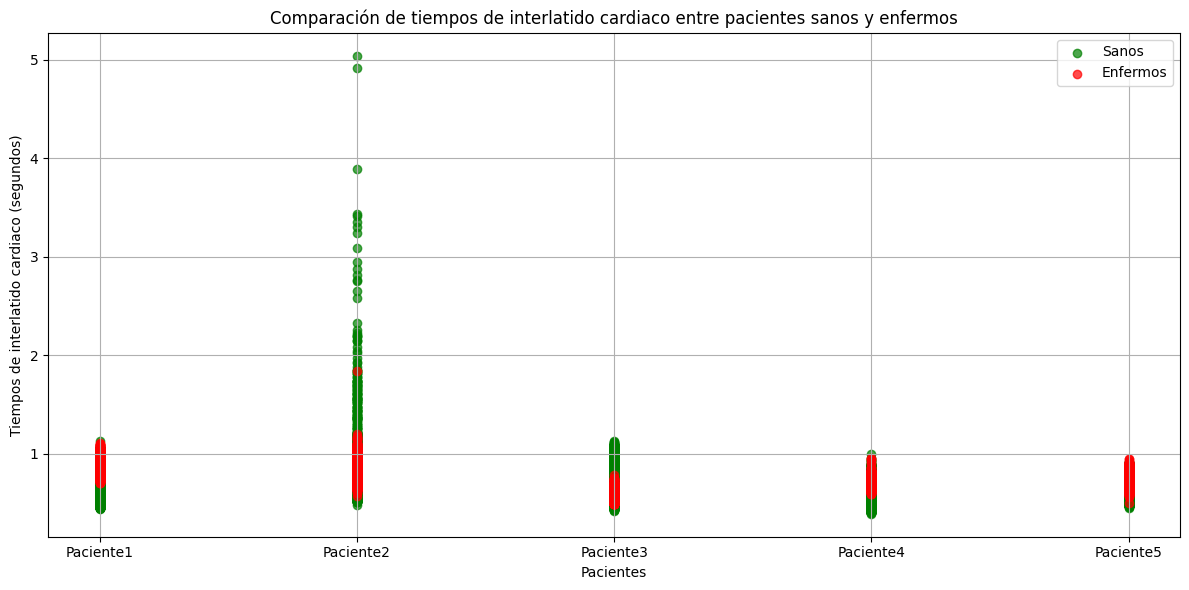

In [147]:
# Cargar los datos de pacientes sanos y enfermos
df_sanos = obtener_pacientes(ruta_sanos)
df_enfermos = obtener_pacientes(ruta_enfermos)

# Visualización de los tiempos de interlatido cardiaco por tipo de paciente
plt.figure(figsize=(12, 6))

# Gráfico de dispersión para pacientes sanos
plt.scatter(df_sanos['Paciente'], df_sanos['Tiempos de interlatido'], label='Sanos', color='green', alpha=0.7)

# Gráfico de dispersión para pacientes enfermos
plt.scatter(df_enfermos['Paciente'], df_enfermos['Tiempos de interlatido'], label='Enfermos', color='red', alpha=0.7)

plt.xlabel('Pacientes')
plt.ylabel('Tiempos de interlatido cardiaco (segundos)')
plt.title('Comparación de tiempos de interlatido cardiaco entre pacientes sanos y enfermos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Medidas de tendencia central

## Media

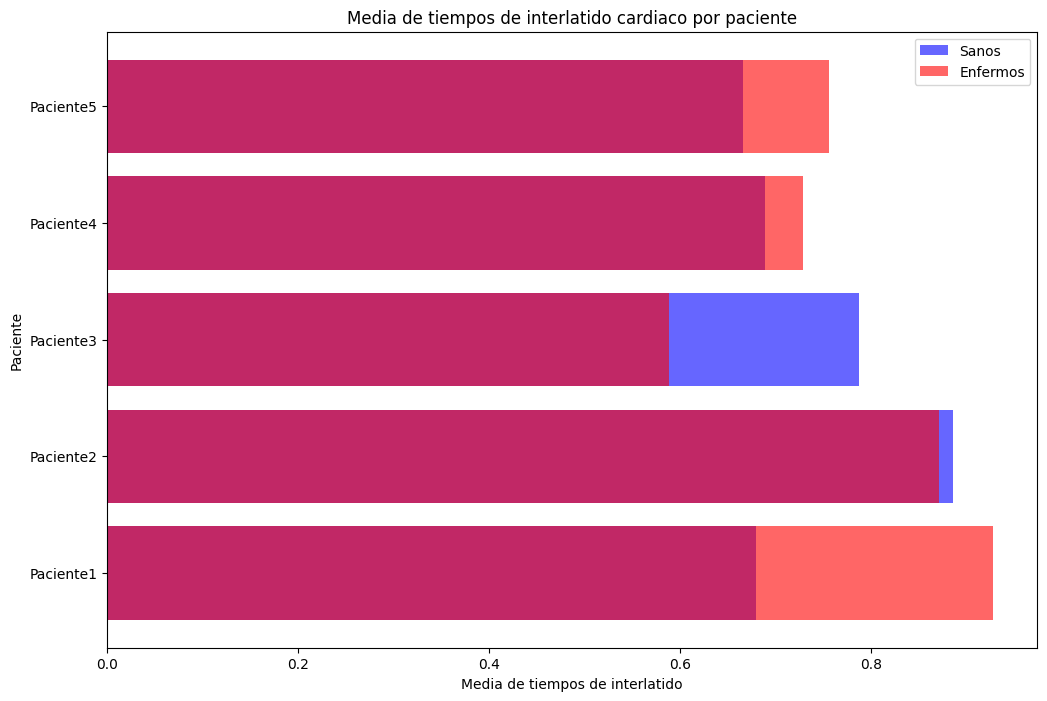

Media de tiempos de interlatido por paciente (Sanos):
Paciente
Paciente1    0.679775
Paciente2    0.886414
Paciente3    0.787494
Paciente4    0.689301
Paciente5    0.665767
Name: Tiempos de interlatido, dtype: float64

Media de tiempos de interlatido por paciente (Enfermos):
Paciente
Paciente1    0.928211
Paciente2    0.871537
Paciente3    0.589019
Paciente4    0.729203
Paciente5    0.756797
Name: Tiempos de interlatido, dtype: float64


In [144]:
# Media
# Calcular la media de los tiempos de interlatido por paciente
media_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].mean()
media_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].mean()

# Preparar datos para el gráfico de barras
pacientes_sanos = media_sanos.index
tiempos_sanos = media_sanos.values

pacientes_enfermos = media_enfermos.index
tiempos_enfermos = media_enfermos.values

# Graficar gráfico de barras
plt.figure(figsize=(12, 8))

plt.barh(pacientes_sanos, tiempos_sanos, label='Sanos', color='blue', alpha=0.6)
plt.barh(pacientes_enfermos, tiempos_enfermos, label='Enfermos', color='red', alpha=0.6)

plt.xlabel('Media de tiempos de interlatido')
plt.ylabel('Paciente')
plt.title('Media de tiempos de interlatido cardiaco por paciente')
plt.legend()

plt.show()

# Imprimir las medias
print("Media de tiempos de interlatido por paciente (Sanos):")
print(media_sanos)
print("\nMedia de tiempos de interlatido por paciente (Enfermos):")
print(media_enfermos)

## Mediana

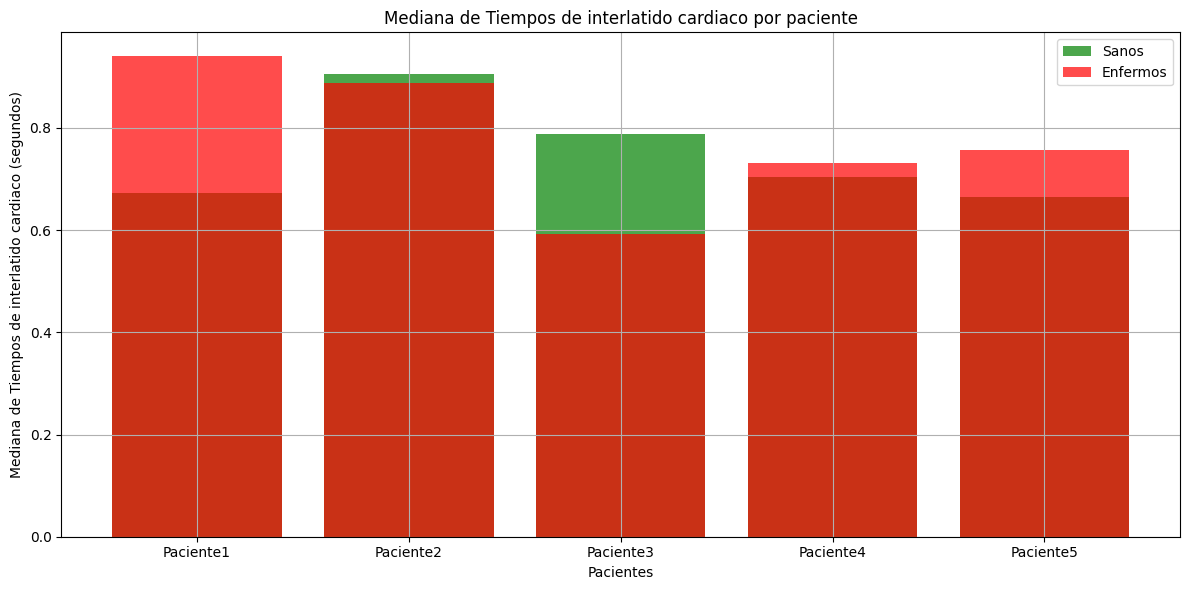

In [150]:
# Calcular la mediana de los tiempos de interlatido por paciente
mediana_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].median()
mediana_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].median()

# Graficar la mediana de tiempos de interlatido por paciente
plt.figure(figsize=(12, 6))

# Gráfico de barras para pacientes sanos
plt.bar(mediana_sanos.index, mediana_sanos.values, label='Sanos', color='green', alpha=0.7)

# Gráfico de barras para pacientes enfermos
plt.bar(mediana_enfermos.index, mediana_enfermos.values, label='Enfermos', color='red', alpha=0.7)

plt.xlabel('Pacientes')
plt.ylabel('Mediana de Tiempos de interlatido cardiaco (segundos)')
plt.title('Mediana de Tiempos de interlatido cardiaco por paciente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Varianza

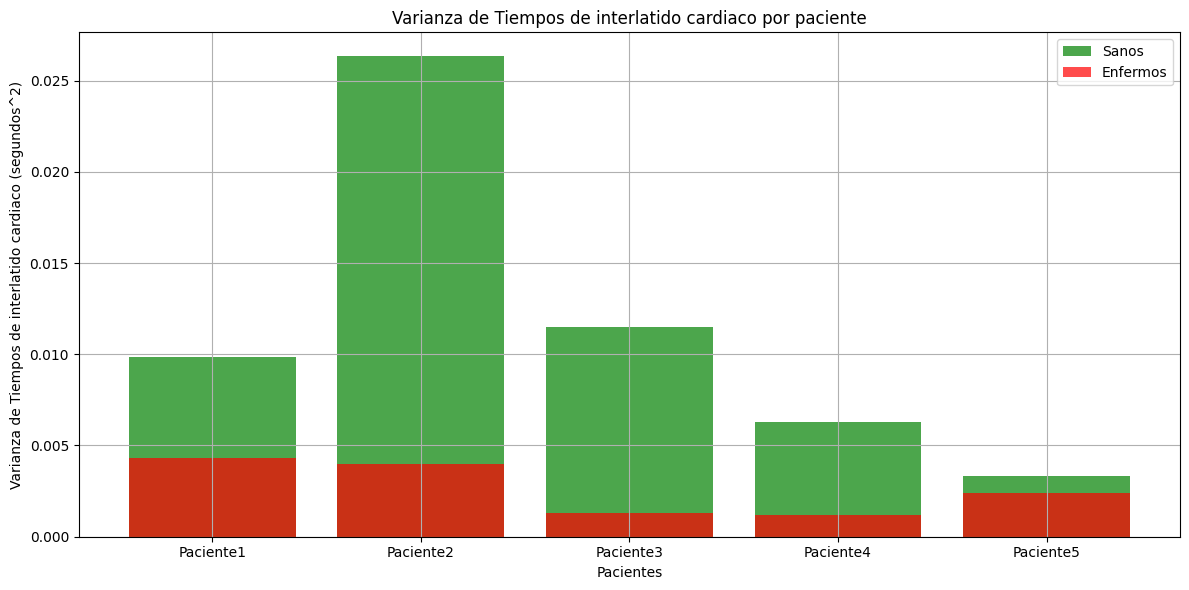

In [151]:
# Calcular la varianza de los tiempos de interlatido por paciente
varianza_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].var()
varianza_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].var()

# Graficar la varianza de tiempos de interlatido por paciente
plt.figure(figsize=(12, 6))

# Gráfico de barras para pacientes sanos
plt.bar(varianza_sanos.index, varianza_sanos.values, label='Sanos', color='green', alpha=0.7)

# Gráfico de barras para pacientes enfermos
plt.bar(varianza_enfermos.index, varianza_enfermos.values, label='Enfermos', color='red', alpha=0.7)

plt.xlabel('Pacientes')
plt.ylabel('Varianza de Tiempos de interlatido cardiaco (segundos^2)')
plt.title('Varianza de Tiempos de interlatido cardiaco por paciente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Desviación estándar

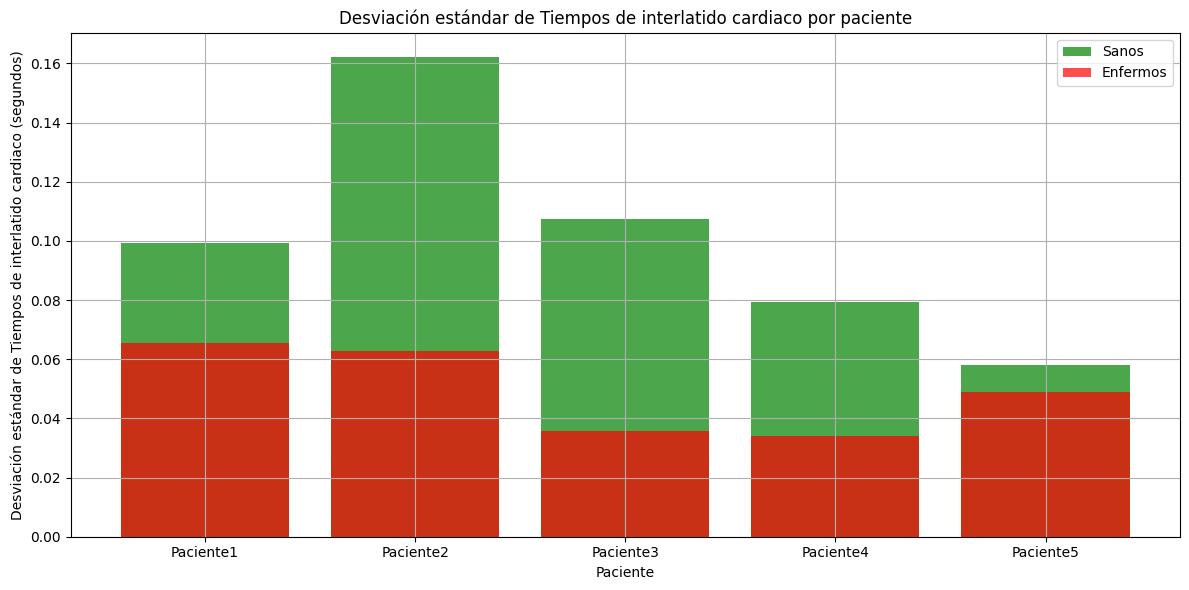

In [152]:
# Calcular la desviación estándar de los tiempos de interlatido por paciente
std_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].std()
std_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].std()

# Graficar la desviación estándar de tiempos de interlatido por paciente
plt.figure(figsize=(12, 6))

# Gráfico de barras para pacientes sanos
plt.bar(std_sanos.index, std_sanos.values, label='Sanos', color='green', alpha=0.7)

# Gráfico de barras para pacientes enfermos
plt.bar(std_enfermos.index, std_enfermos.values, label='Enfermos', color='red', alpha=0.7)

plt.xlabel('Paciente')
plt.ylabel('Desviación estándar de Tiempos de interlatido cardiaco (segundos)')
plt.title('Desviación estándar de Tiempos de interlatido cardiaco por paciente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Moda

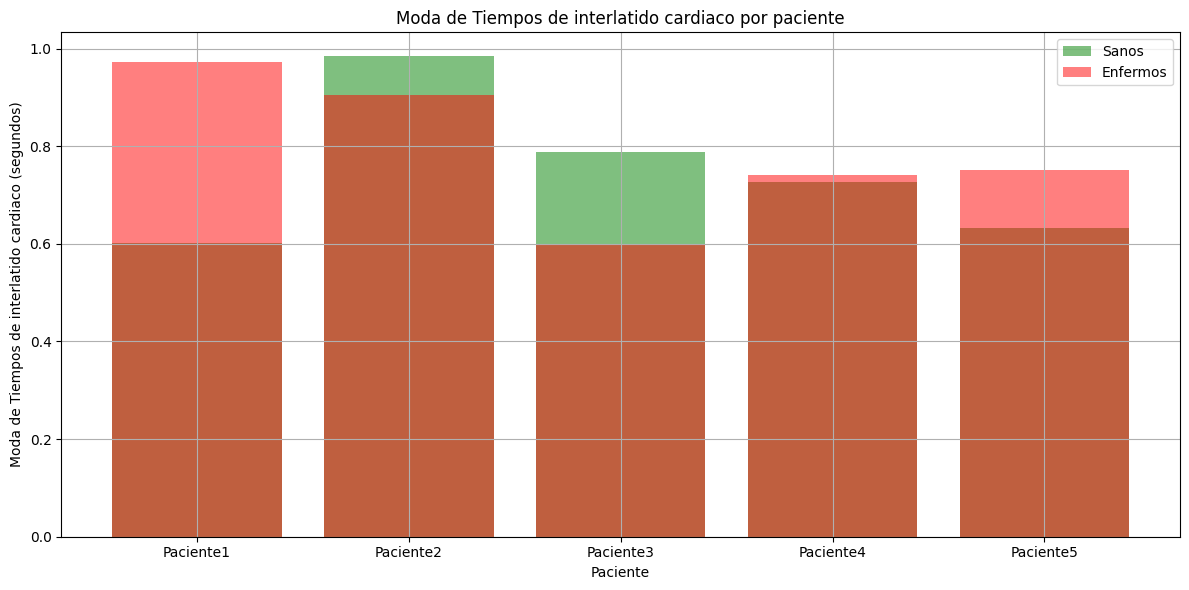

In [156]:
# Calcular la moda de los tiempos de interlatido por paciente
moda_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
moda_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Graficar la moda de tiempos de interlatido por paciente
plt.figure(figsize=(12, 6))

# Gráfico de barras para pacientes sanos
plt.bar(moda_sanos.index, moda_sanos.values, label='Sanos', color='green', alpha=0.5)

# Gráfico de barras para pacientes enfermos
plt.bar(moda_enfermos.index, moda_enfermos.values, label='Enfermos', color='red', alpha=0.5)

plt.xlabel('Paciente')
plt.ylabel('Moda de Tiempos de interlatido cardiaco (segundos)')
plt.title('Moda de Tiempos de interlatido cardiaco por paciente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## rango

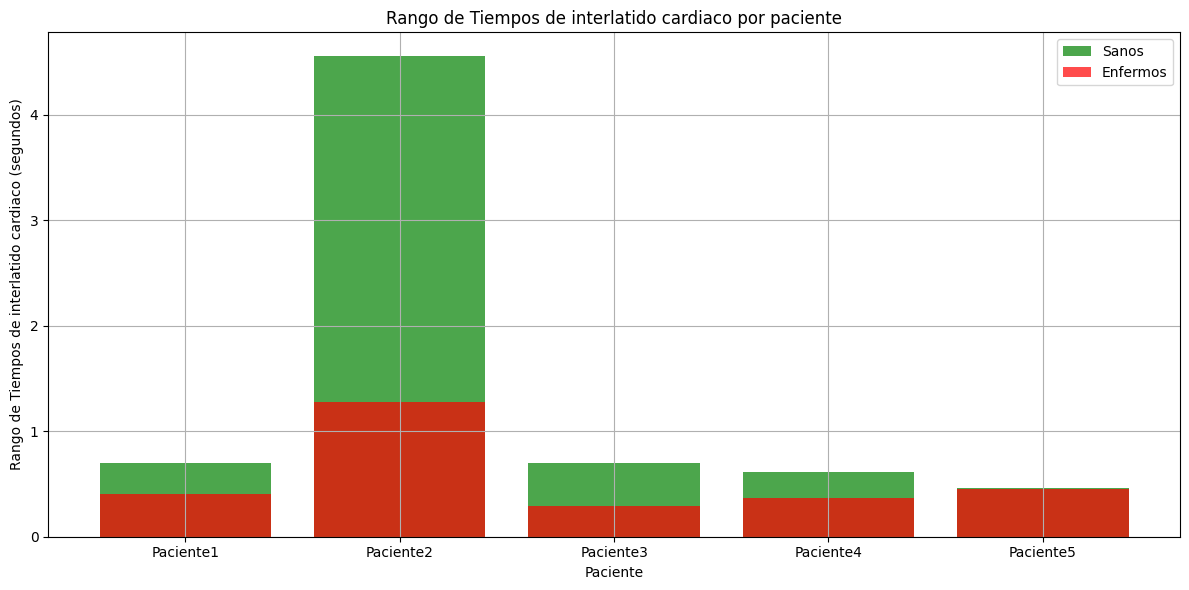

In [157]:
# Calcular el rango de los tiempos de interlatido por paciente
rango_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].apply(lambda x: x.max() - x.min())
rango_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].apply(lambda x: x.max() - x.min())

# Graficar el rango de tiempos de interlatido por paciente
plt.figure(figsize=(12, 6))

# Gráfico de barras para pacientes sanos
plt.bar(rango_sanos.index, rango_sanos.values, label='Sanos', color='green', alpha=0.7)

# Gráfico de barras para pacientes enfermos
plt.bar(rango_enfermos.index, rango_enfermos.values, label='Enfermos', color='red', alpha=0.7)

plt.xlabel('Paciente')
plt.ylabel('Rango de Tiempos de interlatido cardiaco (segundos)')
plt.title('Rango de Tiempos de interlatido cardiaco por paciente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Frecuencias

## Frecuencia absoluta

### Frecuencias absolutas de pacientes enfermos

Tabla de frecuencias absolutas de tiempos de interlatido para pacientes enfermos:
      Li     LS      MC     fe    fpe1    fpe2    fpe3    fpe4    fpe5
0  0.487  0.624  0.5555  29772   29772   29772   29772   29772   29772
1  0.624  0.759  0.6915  46777   76549   76549   76549   76549   76549
2  0.759  0.895  0.8270  34627  111176  111176  111176  111176  111176
3  0.895  1.030  0.9625  27836  139012  139012  139012  139012  139012
4  1.030  1.166  1.0980    266  139278  139278  139278  139278  139278
5  1.166  1.302  1.2340      4  139282  139282  139282  139282  139282
6  1.302  1.437  1.3695      0  139282  139282  139282  139282  139282
7  1.437  1.573  1.5050      0  139282  139282  139282  139282  139282
8  1.573  1.708  1.6405      0  139282  139282  139282  139282  139282
9  1.708  1.844  1.7760      1  139283  139283  139283  139283  139283


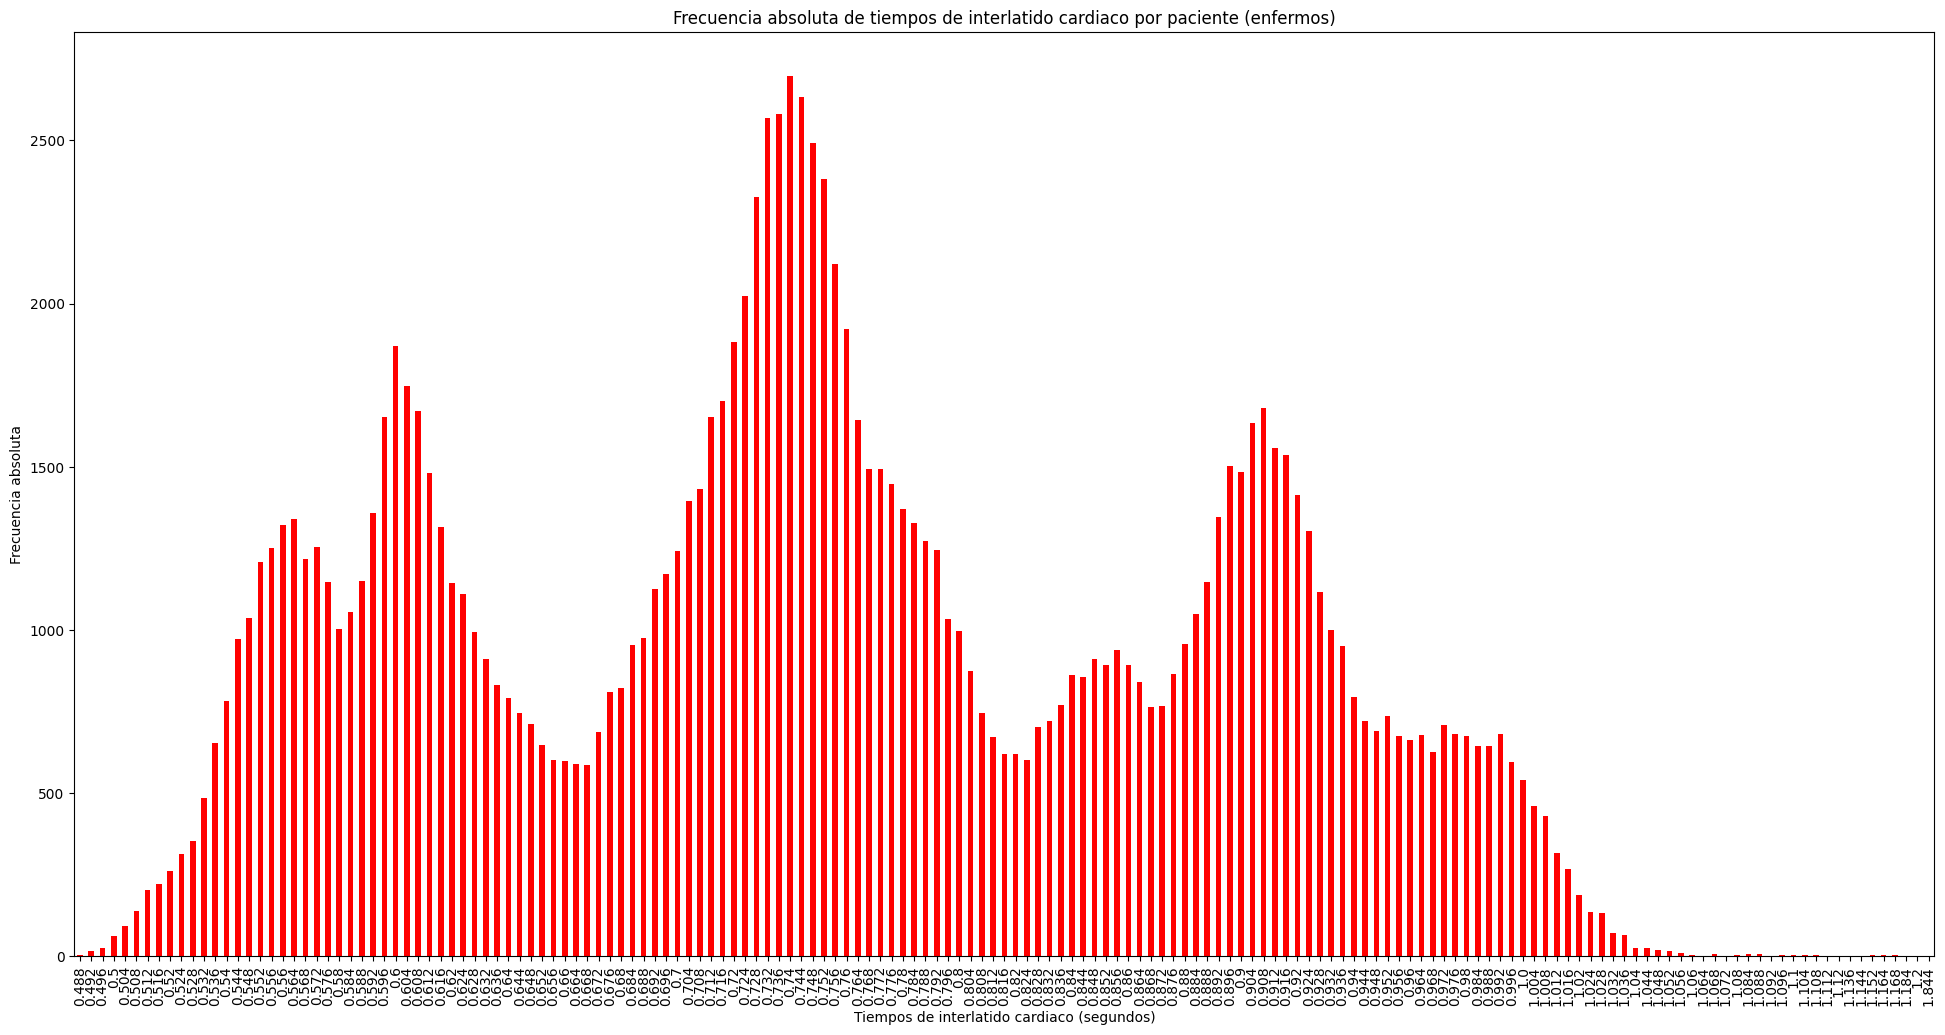

In [173]:
# Calcular las frecuencias absolutas de los tiempos de interlatido
frecuencia_enfermos = df_enfermos['Tiempos de interlatido'].value_counts().sort_index()

# Definir los límites (Li, LS) y el punto medio (MC) para cada intervalo
intervalos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=10)
frecuencias = intervalos.value_counts().sort_index()

tabla_frecuencias = pd.DataFrame({
    'Li': [interval.left for interval in frecuencias.index],
    'LS': [interval.right for interval in frecuencias.index],
    'MC': [(interval.left + interval.right) / 2 for interval in frecuencias.index],
    'fe': frecuencias.values
})

# Calcular las frecuencias acumuladas (fpe1, fpe2, ...)
tabla_frecuencias['fpe1'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fpe2'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fpe3'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fpe4'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fpe5'] = tabla_frecuencias['fe'].cumsum()

# Imprimir la tabla de frecuencias
print("Tabla de frecuencias absolutas de tiempos de interlatido para pacientes enfermos:")
print(tabla_frecuencias)

# Graficar las frecuencias absolutas
plt.figure(figsize=(24, 12))
frecuencia_enfermos.plot(kind='bar', color='red')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia absoluta de tiempos de interlatido cardiaco por paciente (enfermos)')
plt.show()

### Frecuencias absolutas de pacientes sanos

Tabla de frecuencias absolutas de tiempos de interlatido para pacientes sanos:
      Li     LS      MC      fe    fps1    fps2    fps3    fps4    fps5
0  0.386  0.856  0.6210  123011  123011  123011  123011  123011  123011
1  0.856  1.321  1.0885   21475  144486  144486  144486  144486  144486
2  1.321  1.785  1.5530      82  144568  144568  144568  144568  144568
3  1.785  2.250  2.0175      23  144591  144591  144591  144591  144591
4  2.250  2.715  2.4825       4  144595  144595  144595  144595  144595
5  2.715  3.180  2.9475       6  144601  144601  144601  144601  144601
6  3.180  3.645  3.4125       5  144606  144606  144606  144606  144606
7  3.645  4.109  3.8770       1  144607  144607  144607  144607  144607
8  4.109  4.574  4.3415       0  144607  144607  144607  144607  144607
9  4.574  5.039  4.8065       2  144609  144609  144609  144609  144609


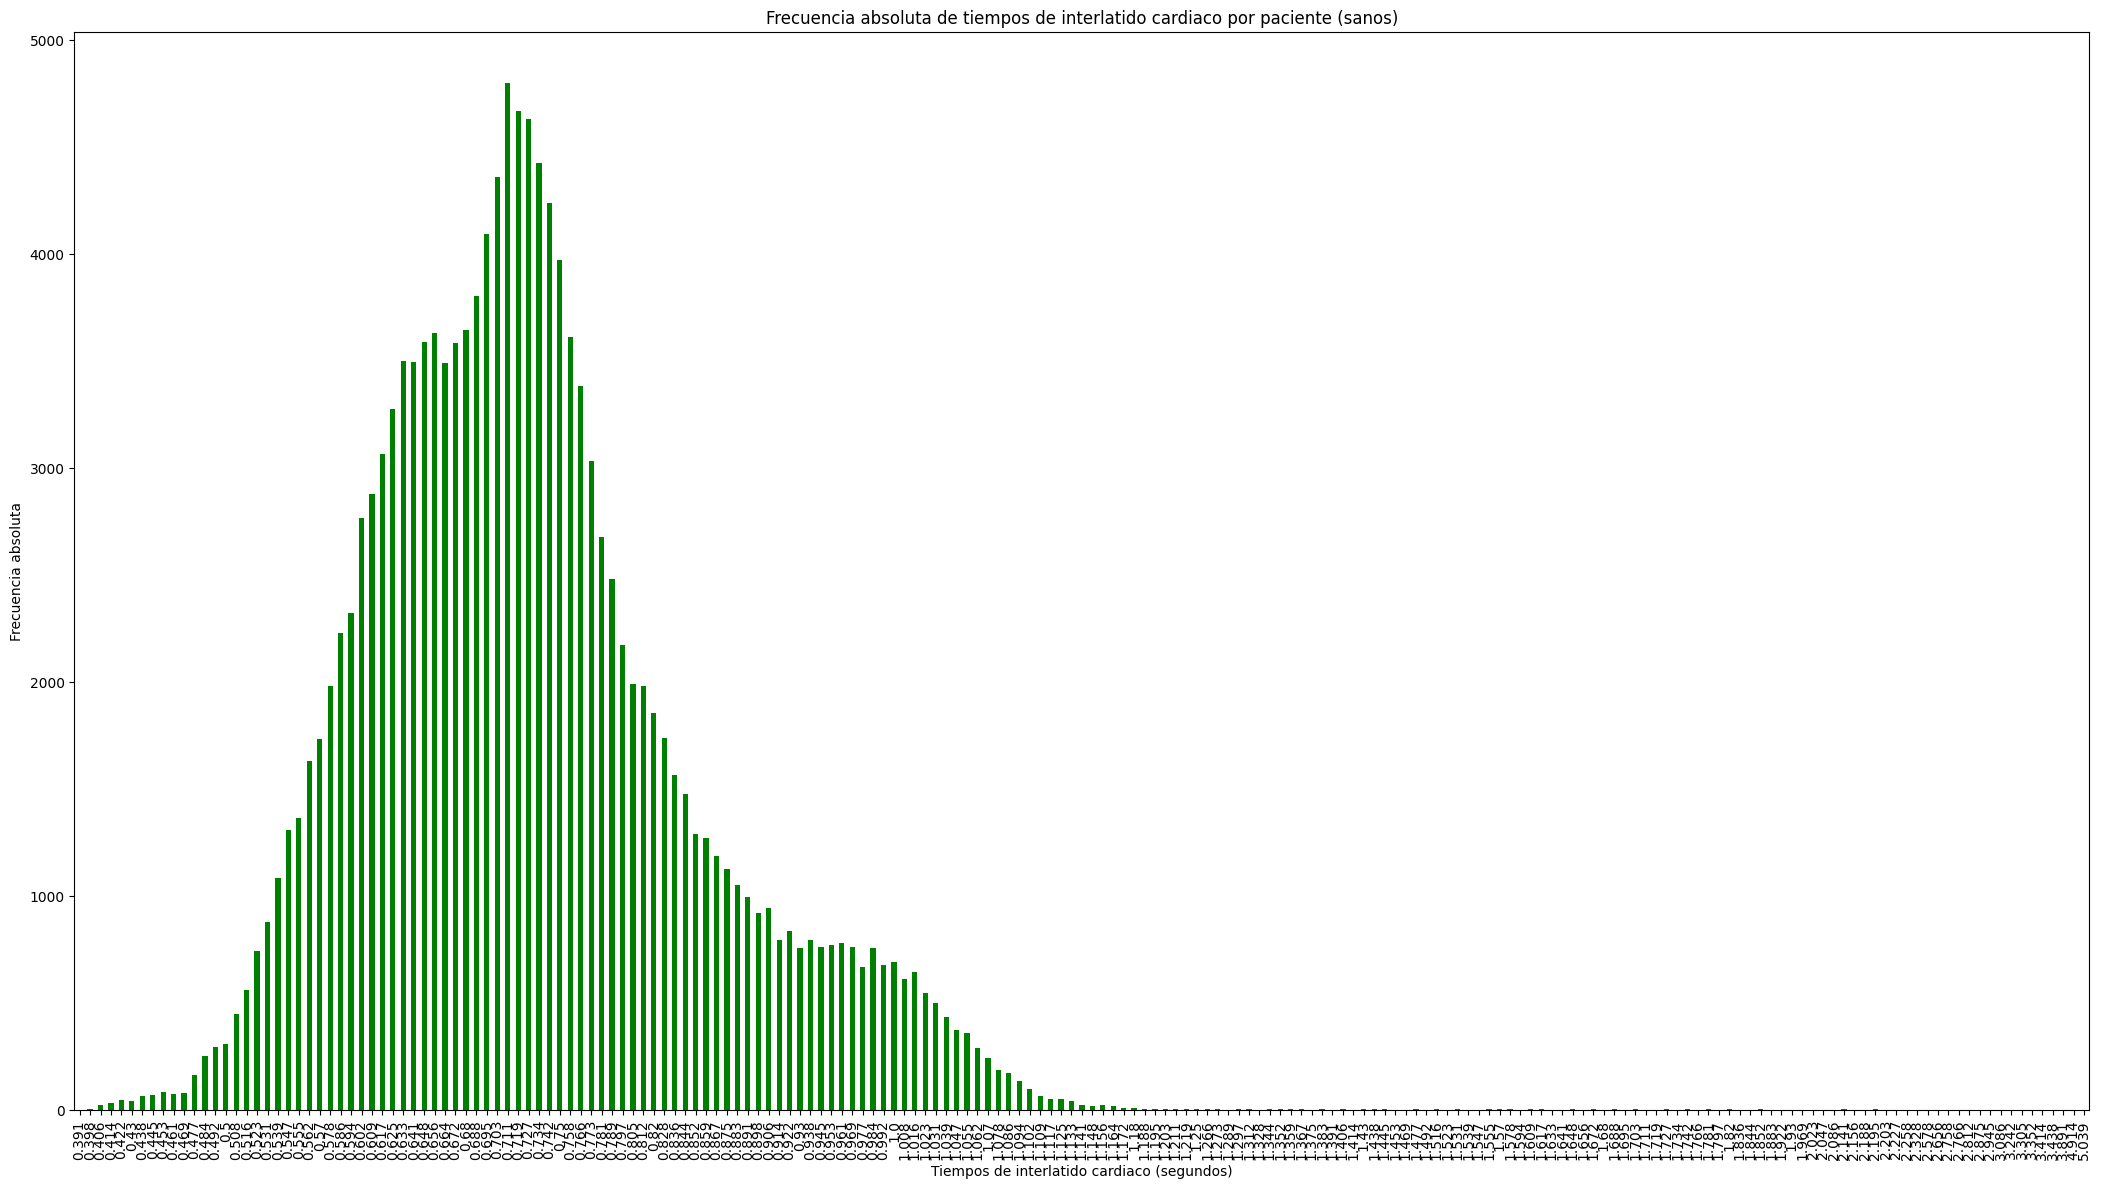

In [178]:
# Calcular las frecuencias absolutas de los tiempos de interlatido
frecuencia_sanos = df_sanos['Tiempos de interlatido'].value_counts().sort_index()

# Definir los límites (Li, LS) y el punto medio (MC) para cada intervalo
intervalos = pd.cut(df_sanos['Tiempos de interlatido'], bins=10)
frecuencias = intervalos.value_counts().sort_index()

tabla_frecuencias = pd.DataFrame({
    'Li': [interval.left for interval in frecuencias.index],
    'LS': [interval.right for interval in frecuencias.index],
    'MC': [(interval.left + interval.right) / 2 for interval in frecuencias.index],
    'fe': frecuencias.values
})

# Calcular las frecuencias acumuladas (fps1, fps2, ...)
tabla_frecuencias['fps1'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fps2'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fps3'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fps4'] = tabla_frecuencias['fe'].cumsum()
tabla_frecuencias['fps5'] = tabla_frecuencias['fe'].cumsum()

# Imprimir la tabla de frecuencias
print("Tabla de frecuencias absolutas de tiempos de interlatido para pacientes sanos:")
print(tabla_frecuencias)

# Graficar las frecuencias absolutas
plt.figure(figsize=(26, 14))
frecuencia_sanos.plot(kind='bar', color='green')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencia absoluta de tiempos de interlatido cardiaco por paciente (sanos)')
plt.show()

### Frecuencia absoluta por grupo

Tabla de frecuencias absolutas de tiempos de interlatido por grupo:
       Li      LS      MC     f_s     f_e     f_t
0  0.3910  0.8558  0.6234  123010  101624  224634
1  0.8558  1.3206  1.0882   21475   37658   59133
2  1.3206  1.7854  1.5530      82       0      82
3  1.7854  2.2502  2.0178      23       1      24
4  2.2502  2.7150  2.4826       4       0       4
5  2.7150  3.1798  2.9474       6       0       6
6  3.1798  3.6446  3.4122       5       0       5
7  3.6446  4.1094  3.8770       1       0       1
8  4.1094  4.5742  4.3418       0       0       0
9  4.5742  5.0390  4.8066       2       0       2


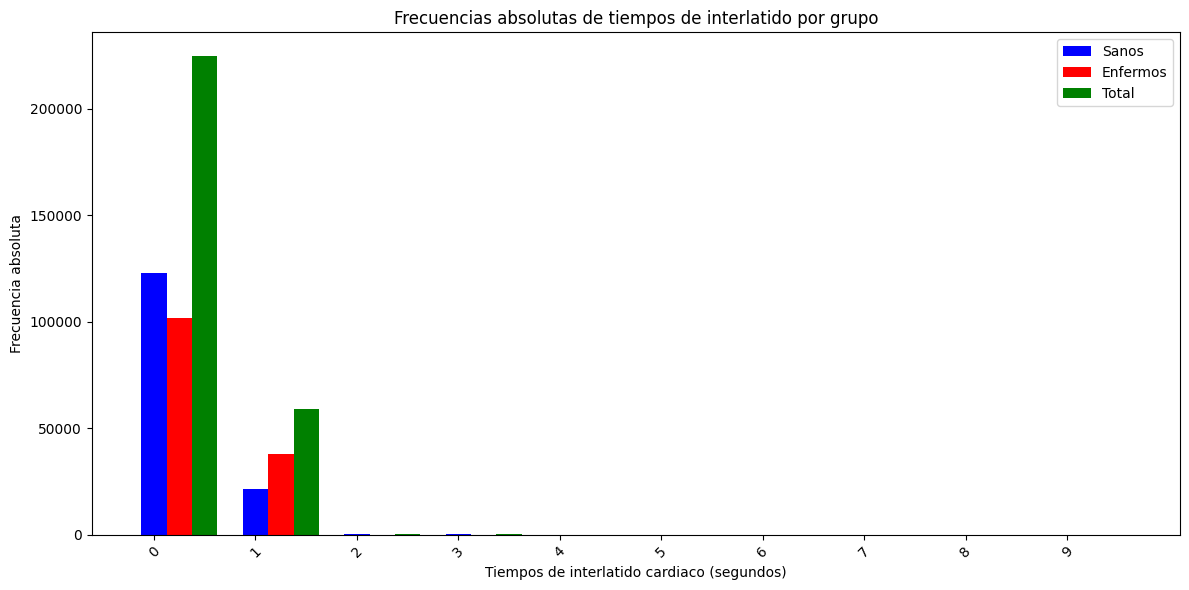

In [207]:
# Definir límites de intervalos basados en los datos reales
intervalos = pd.interval_range(start=df_sanos['Tiempos de interlatido'].min(), 
                               end=df_sanos['Tiempos de interlatido'].max(), 
                               freq=(df_sanos['Tiempos de interlatido'].max() - df_sanos['Tiempos de interlatido'].min()) / 10)

# Calcular las frecuencias absolutas para sanos y enfermos usando los mismos intervalos
frecuencias_absolutas_sanos = pd.cut(df_sanos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()
frecuencias_absolutas_enfermos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Calcular la frecuencia total
frecuencia_total = frecuencias_absolutas_sanos + frecuencias_absolutas_enfermos

# Crear DataFrame para las frecuencias absolutas por grupos
tabla_frecuencias_abs = pd.DataFrame({
    'Li': [interval.left for interval in intervalos],
    'LS': [interval.right for interval in intervalos],
    'MC': [(interval.left + interval.right) / 2 for interval in intervalos],
    'f_s': frecuencias_absolutas_sanos.values,
    'f_e': frecuencias_absolutas_enfermos.values,
    'f_t': frecuencia_total.values,
})

# Imprimir la tabla de frecuencias absolutas por grupos
print("Tabla de frecuencias absolutas de tiempos de interlatido por grupo:")
print(tabla_frecuencias_abs)

# Graficar las frecuencias absolutas por grupos
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias_abs.index, tabla_frecuencias_abs['f_s'], width=0.25, label='Sanos', color='blue', align='center')
plt.bar(tabla_frecuencias_abs.index + 0.25, tabla_frecuencias_abs['f_e'], width=0.25, label='Enfermos', color='red', align='center')
plt.bar(tabla_frecuencias_abs.index + 0.5, tabla_frecuencias_abs['f_t'], width=0.25, label='Total', color='green', align='center')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencias absolutas de tiempos de interlatido por grupo')
plt.legend()
plt.xticks(range(len(tabla_frecuencias_abs)), tabla_frecuencias_abs.index, rotation=45)
plt.tight_layout()
plt.show()

## Frecuencia Relativa

### Frecuencias relativas de pacientes sanos

Tabla de frecuencias relativas de tiempos de interlatido para pacientes sanos:
      Li     LS      MC       f_e     f_pe1     f_pe2     f_pe3     f_pe4  \
0  0.386  0.856  0.6210  0.850646  0.850646  0.850646  0.850646  0.850646   
1  0.856  1.321  1.0885  0.148504  0.999149  0.999149  0.999149  0.999149   
2  1.321  1.785  1.5530  0.000567  0.999716  0.999716  0.999716  0.999716   
3  1.785  2.250  2.0175  0.000159  0.999876  0.999876  0.999876  0.999876   
4  2.250  2.715  2.4825  0.000028  0.999903  0.999903  0.999903  0.999903   
5  2.715  3.180  2.9475  0.000041  0.999945  0.999945  0.999945  0.999945   
6  3.180  3.645  3.4125  0.000035  0.999979  0.999979  0.999979  0.999979   
7  3.645  4.109  3.8770  0.000007  0.999986  0.999986  0.999986  0.999986   
8  4.109  4.574  4.3415  0.000000  0.999986  0.999986  0.999986  0.999986   
9  4.574  5.039  4.8065  0.000014  1.000000  1.000000  1.000000  1.000000   

      f_pe5  
0  0.850646  
1  0.999149  
2  0.999716  
3  0.999876  
4  

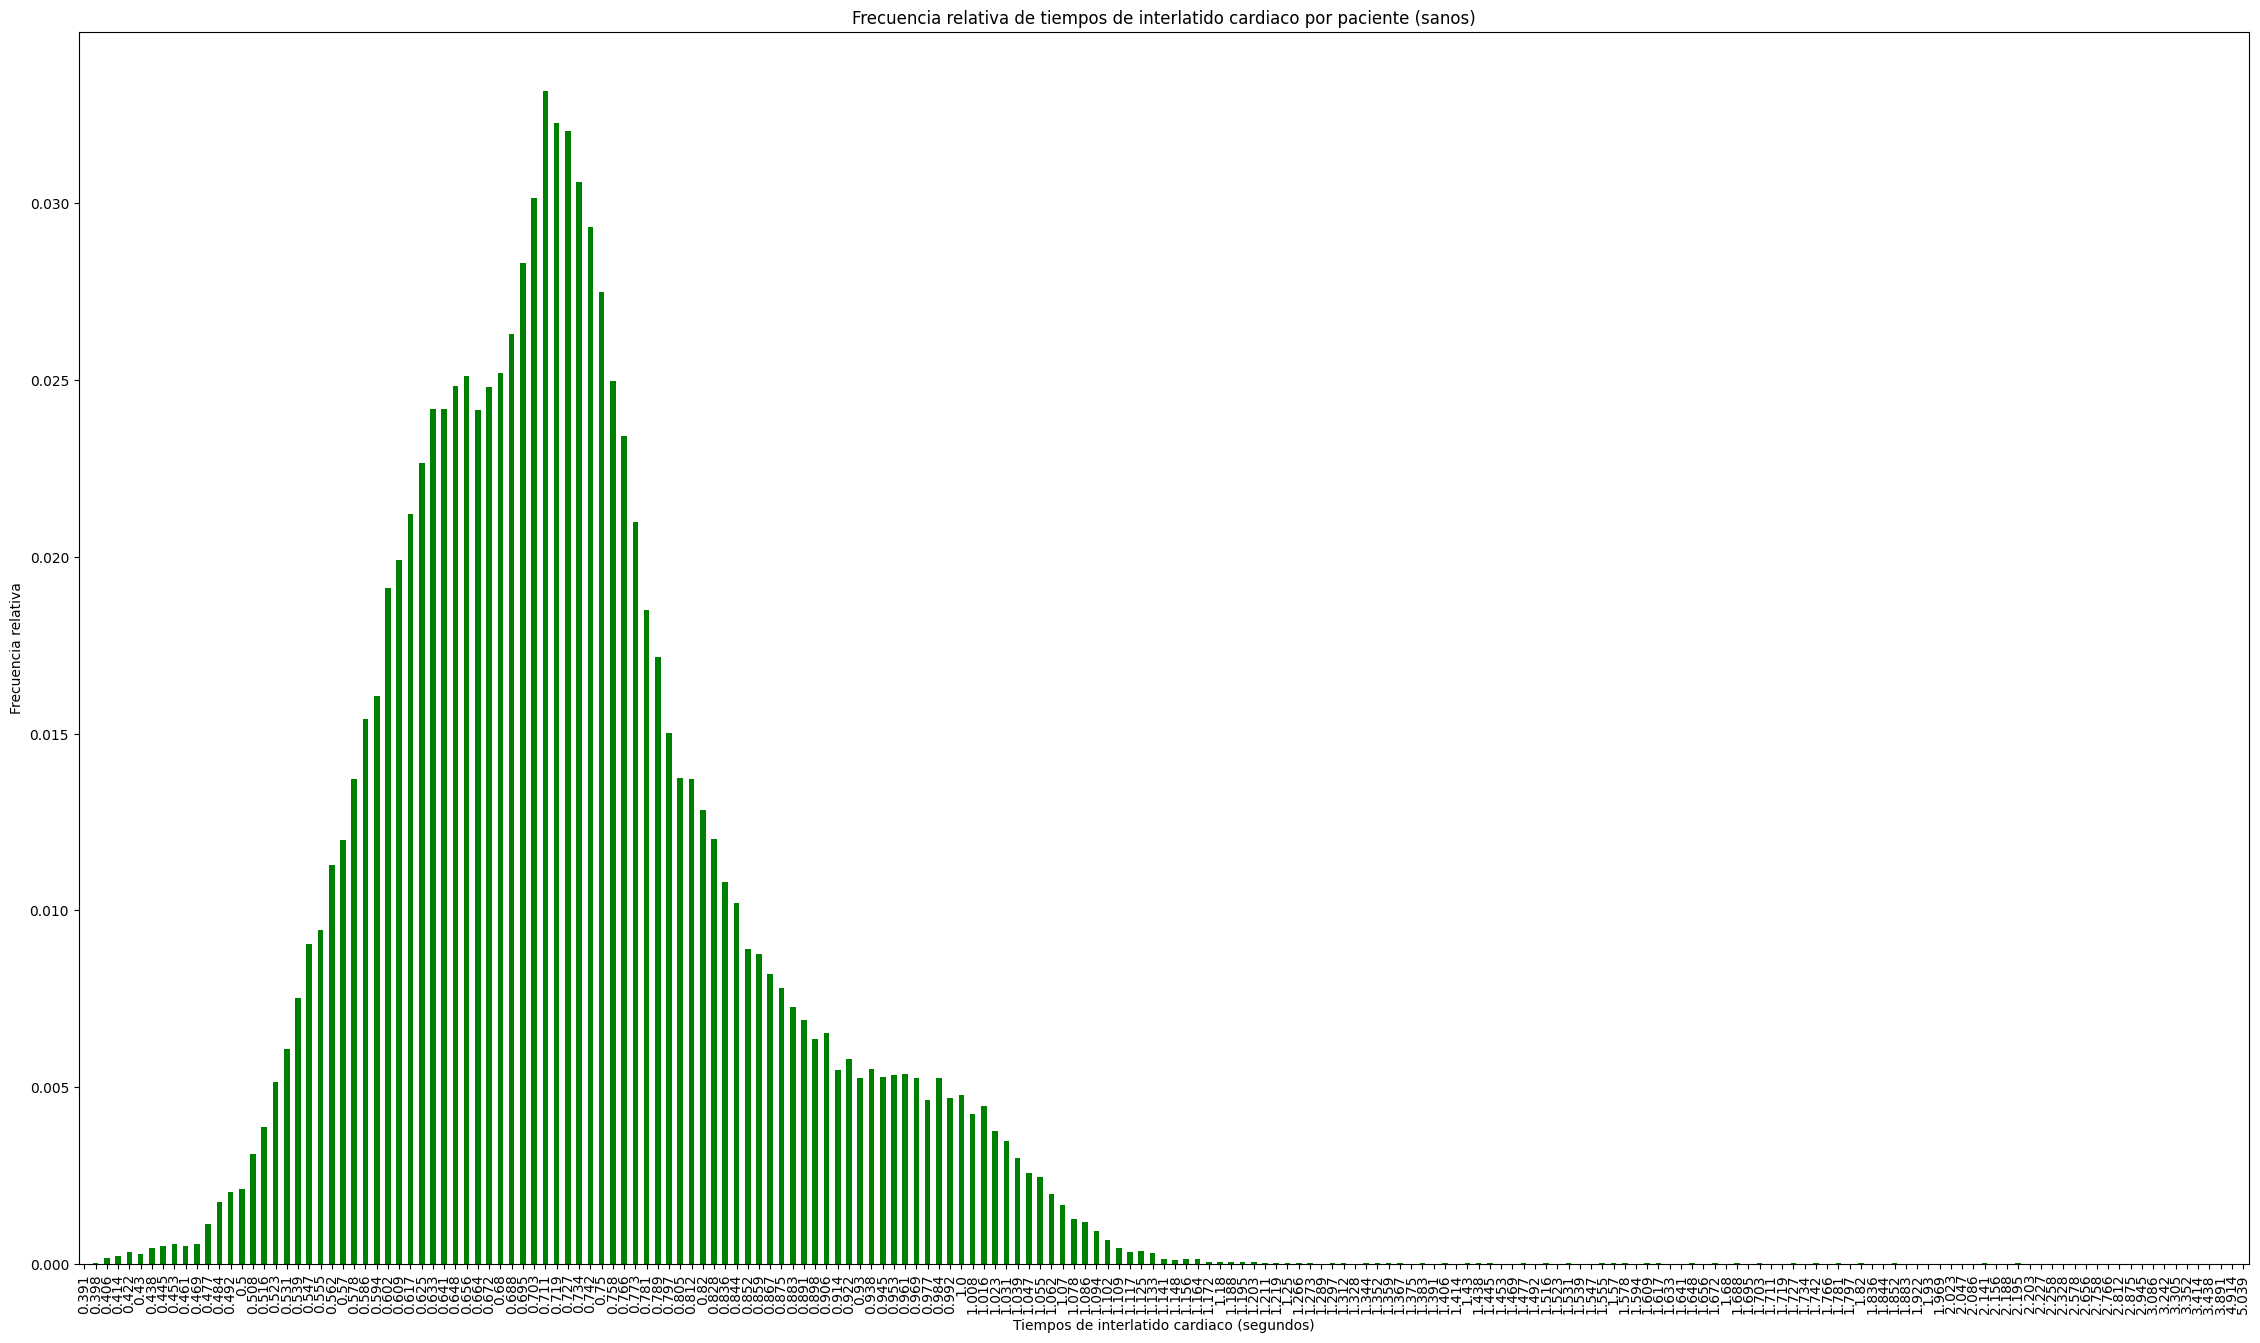

In [191]:
# Calcular las frecuencias absolutas de los tiempos de interlatido
frecuencia_absoluta_sanos = df_sanos['Tiempos de interlatido'].value_counts().sort_index()
# Calcular las frecuencias relativas
frecuencia_relativa_sanos = frecuencia_absoluta_sanos / frecuencia_absoluta_sanos.sum()

# Definir los límites (Li, LS) y el punto medio (MC) para cada intervalo
intervalos = pd.cut(df_sanos['Tiempos de interlatido'], bins=10)
frecuencias = intervalos.value_counts().sort_index()

tabla_frecuencias_relativas = pd.DataFrame({
    'Li': [interval.left for interval in frecuencias.index],
    'LS': [interval.right for interval in frecuencias.index],
    'MC': [(interval.left + interval.right) / 2 for interval in frecuencias.index],
    'f_e': frecuencias.values / frecuencias.values.sum()
})

# Calcular las frecuencias acumuladas relativas (f_pe1, f_pe2, ...)
tabla_frecuencias_relativas['f_pe1'] = tabla_frecuencias_relativas['f_e'].cumsum()
tabla_frecuencias_relativas['f_pe2'] = tabla_frecuencias_relativas['f_e'].cumsum()
tabla_frecuencias_relativas['f_pe3'] = tabla_frecuencias_relativas['f_e'].cumsum()
tabla_frecuencias_relativas['f_pe4'] = tabla_frecuencias_relativas['f_e'].cumsum()
tabla_frecuencias_relativas['f_pe5'] = tabla_frecuencias_relativas['f_e'].cumsum()

# Imprimir la tabla de frecuencias relativas
print("Tabla de frecuencias relativas de tiempos de interlatido para pacientes sanos:")
print(tabla_frecuencias_relativas)

# Graficar las frecuencias relativas
plt.figure(figsize=(28, 16))
frecuencia_relativa_sanos.plot(kind='bar', color='green')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia relativa')
plt.title('Frecuencia relativa de tiempos de interlatido cardiaco por paciente (sanos)')
plt.show()

### Frecuencias relativas de pacientes enefermos

Tabla de frecuencias relativas de tiempos de interlatido para pacientes enfermos:
      Li     LS      MC        fs      fps1      fps2      fps3      fps4  \
0  0.487  0.624  0.5555  0.213752  0.213752  0.213752  0.213752  0.213752   
1  0.624  0.759  0.6915  0.335841  0.549593  0.549593  0.549593  0.549593   
2  0.759  0.895  0.8270  0.248609  0.798202  0.798202  0.798202  0.798202   
3  0.895  1.030  0.9625  0.199852  0.998054  0.998054  0.998054  0.998054   
4  1.030  1.166  1.0980  0.001910  0.999964  0.999964  0.999964  0.999964   
5  1.166  1.302  1.2340  0.000029  0.999993  0.999993  0.999993  0.999993   
6  1.302  1.437  1.3695  0.000000  0.999993  0.999993  0.999993  0.999993   
7  1.437  1.573  1.5050  0.000000  0.999993  0.999993  0.999993  0.999993   
8  1.573  1.708  1.6405  0.000000  0.999993  0.999993  0.999993  0.999993   
9  1.708  1.844  1.7760  0.000007  1.000000  1.000000  1.000000  1.000000   

       fps5  
0  0.213752  
1  0.549593  
2  0.798202  
3  0.998054  


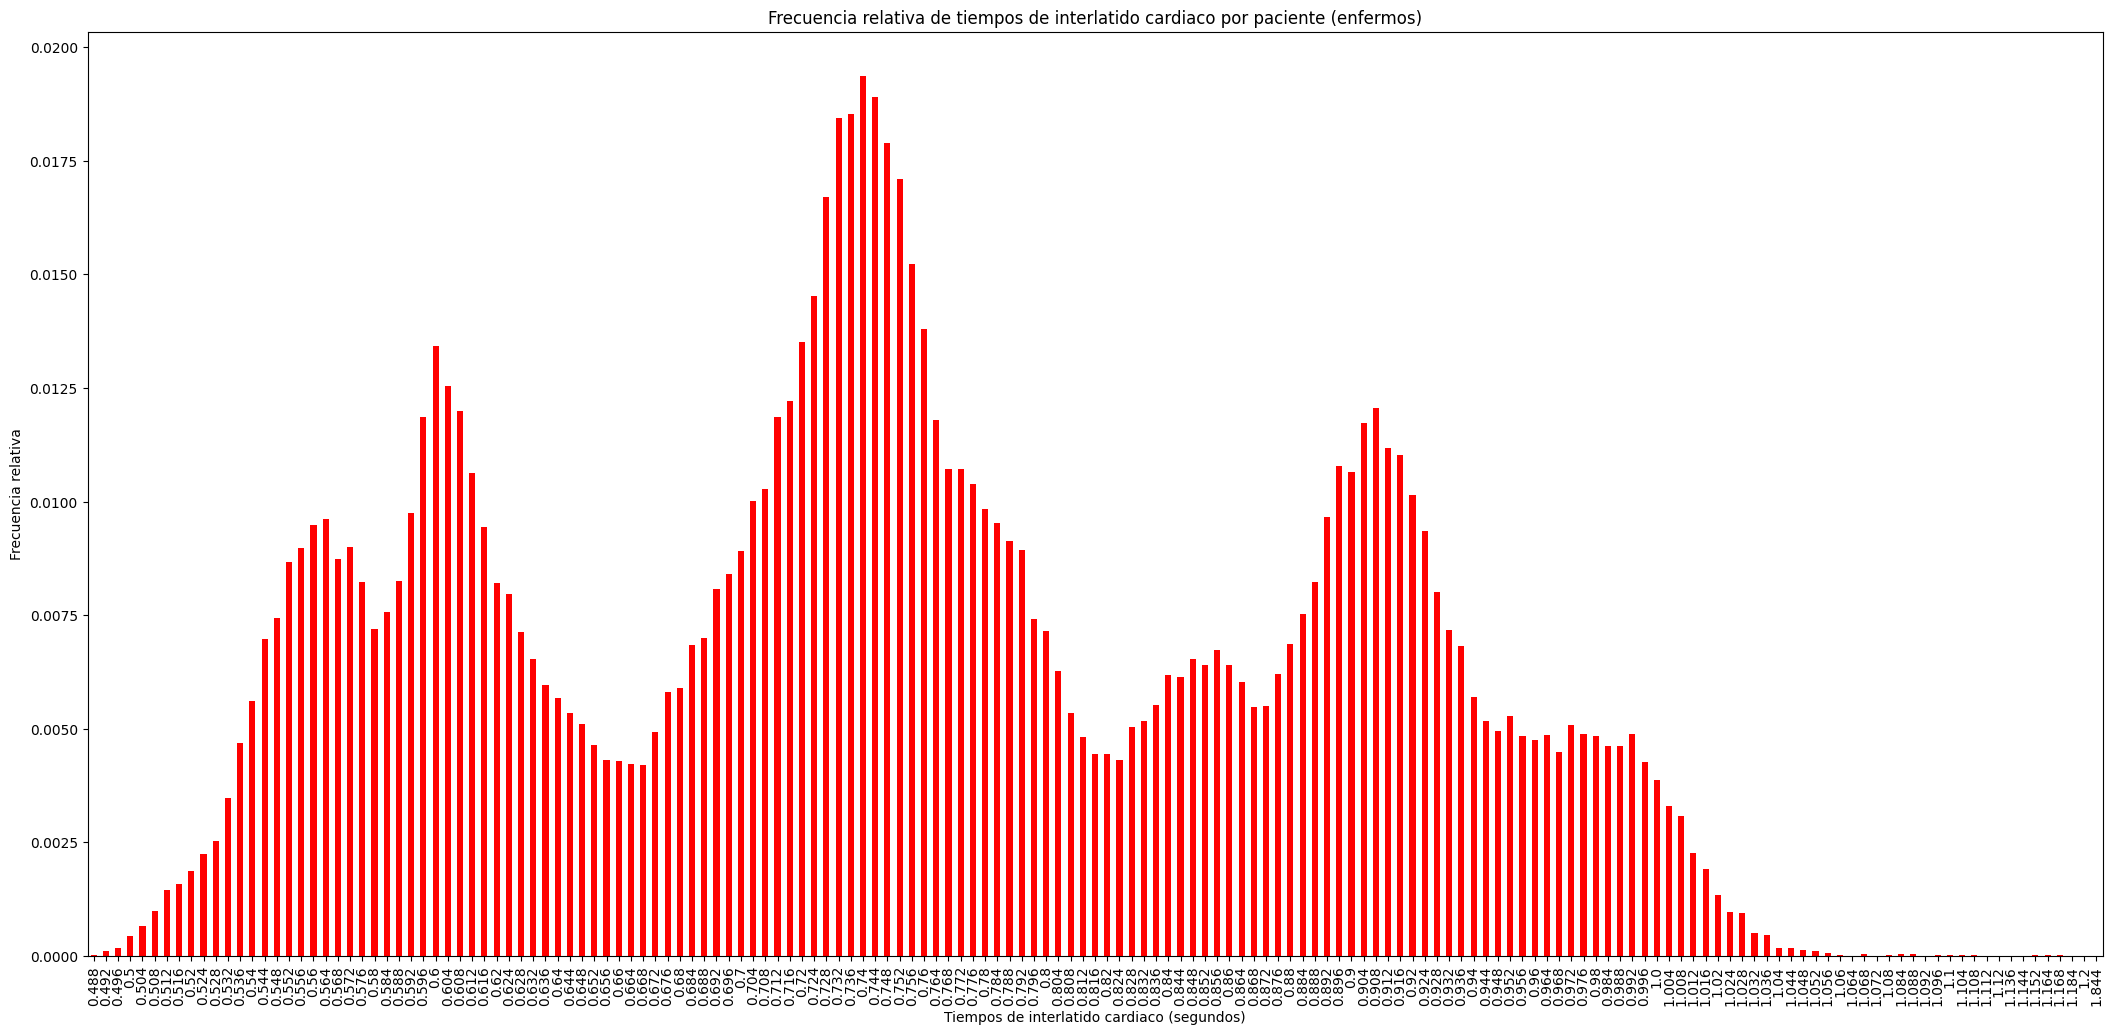

In [192]:
# Calcular las frecuencias absolutas de los tiempos de interlatido
frecuencia_absoluta_enfermos = df_enfermos['Tiempos de interlatido'].value_counts().sort_index()

# Calcular las frecuencias relativas
frecuencia_relativa_enfermos = frecuencia_absoluta_enfermos / frecuencia_absoluta_enfermos.sum()

# Definir los límites (Li, LS) y el punto medio (MC) para cada intervalo
intervalos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=10)
frecuencias = intervalos.value_counts().sort_index()

tabla_frecuencias_relativas = pd.DataFrame({
    'Li': [interval.left for interval in frecuencias.index],
    'LS': [interval.right for interval in frecuencias.index],
    'MC': [(interval.left + interval.right) / 2 for interval in frecuencias.index],
    'fs': frecuencias.values / frecuencias.values.sum()
})

# Calcular las frecuencias acumuladas relativas (fps1, fps2, ...)
tabla_frecuencias_relativas['fps1'] = tabla_frecuencias_relativas['fs'].cumsum()
tabla_frecuencias_relativas['fps2'] = tabla_frecuencias_relativas['fs'].cumsum()
tabla_frecuencias_relativas['fps3'] = tabla_frecuencias_relativas['fs'].cumsum()
tabla_frecuencias_relativas['fps4'] = tabla_frecuencias_relativas['fs'].cumsum()
tabla_frecuencias_relativas['fps5'] = tabla_frecuencias_relativas['fs'].cumsum()

# Imprimir la tabla de frecuencias relativas
print("Tabla de frecuencias relativas de tiempos de interlatido para pacientes enfermos:")
print(tabla_frecuencias_relativas)

# Graficar las frecuencias relativas
plt.figure(figsize=(26, 12))
frecuencia_relativa_enfermos.plot(kind='bar', color='red')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia relativa')
plt.title('Frecuencia relativa de tiempos de interlatido cardiaco por paciente (enfermos)')
plt.show()

### Frecuencias relativas por grupos

Tabla de frecuencias relativas de tiempos de interlatido por grupo:
    Li   LS    MC        fs        fe
0  0.4  0.9  0.65  0.850646  0.213752
1  0.9  1.3  1.10  0.148504  0.335841
2  1.3  1.8  1.55  0.000567  0.248609
3  1.8  2.3  2.05  0.000159  0.199852
4  2.3  2.7  2.50  0.000028  0.001910
5  2.7  3.2  2.95  0.000041  0.000029
6  3.2  3.6  3.40  0.000035  0.000000
7  3.6  4.1  3.85  0.000007  0.000000
8  4.1  4.6  4.35  0.000000  0.000000
9  4.6  5.0  4.80  0.000014  0.000007


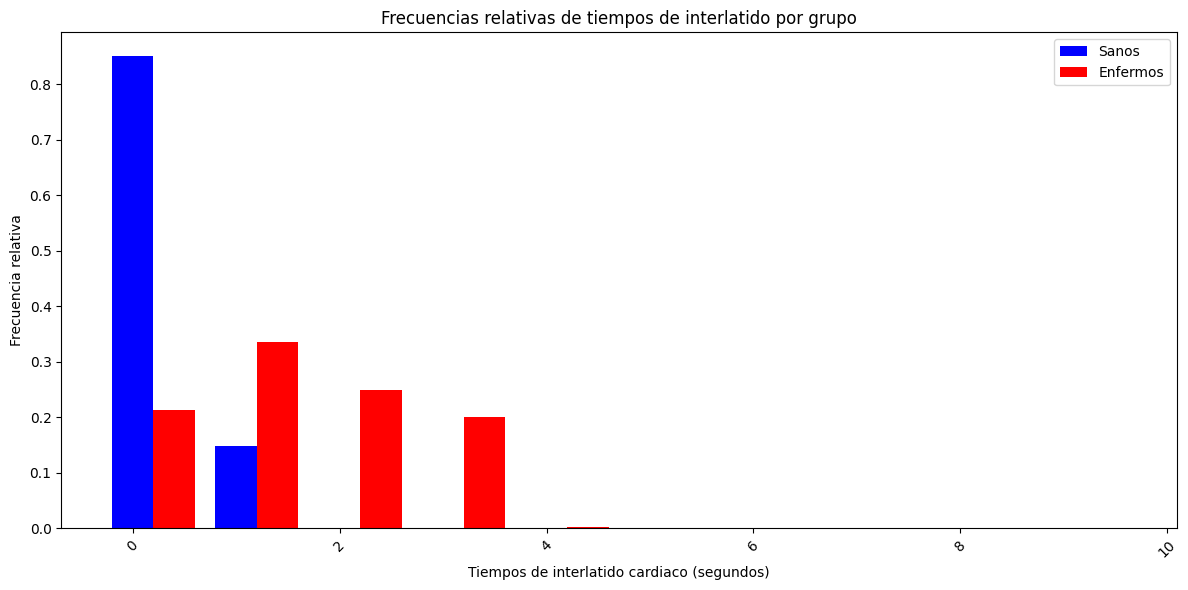

In [203]:
# Definir los límites (Li, LS) y el punto medio (MC) para cada intervalo
intervalos_sanos = pd.cut(df_sanos['Tiempos de interlatido'], bins=10, precision=0)
intervalos_enfermos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=10, precision=0)

# Calcular las frecuencias absolutas para sanos y enfermos
frecuencias_absolutas_sanos = intervalos_sanos.value_counts().sort_index()
frecuencias_absolutas_enfermos = intervalos_enfermos.value_counts().sort_index()

# Calcular las frecuencias relativas para sanos y enfermos
frecuencias_relativas_sanos = frecuencias_absolutas_sanos / frecuencias_absolutas_sanos.sum()
frecuencias_relativas_enfermos = frecuencias_absolutas_enfermos / frecuencias_absolutas_enfermos.sum()

# Crear DataFrame para las frecuencias relativas por grupos
tabla_frecuencias_rel = pd.DataFrame({
    'Li': [interval.left for interval in frecuencias_absolutas_sanos.index],
    'LS': [interval.right for interval in frecuencias_absolutas_sanos.index],
    'MC': [(interval.left + interval.right) / 2 for interval in frecuencias_absolutas_sanos.index],
    'fs': frecuencias_relativas_sanos.values,
    'fe': frecuencias_relativas_enfermos.values,
})

# Imprimir la tabla de frecuencias relativas por grupos
print("Tabla de frecuencias relativas de tiempos de interlatido por grupo:")
print(tabla_frecuencias_rel)

# Graficar las frecuencias relativas por grupos
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias_rel.index, tabla_frecuencias_rel['fs'], width=0.4, label='Sanos', color='blue', align='center')
plt.bar(tabla_frecuencias_rel.index + 0.4, tabla_frecuencias_rel['fe'], width=0.4, label='Enfermos', color='red', align='center')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia relativa')
plt.title('Frecuencias relativas de tiempos de interlatido por grupo')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Marcas de Clase

Tabla de frecuencias absolutas de tiempos de interlatido por grupo con marcas de clase:
       LI      LS     LRI     LRS      MC     f_s     f_e     f_t
0  0.3910  0.8558 -0.1090  1.3558  0.6234  123010  101624  224634
1  0.8558  1.3206  0.3558  1.8206  1.0882   21475   37658   59133
2  1.3206  1.7854  0.8206  2.2854  1.5530      82       0      82
3  1.7854  2.2502  1.2854  2.7502  2.0178      23       1      24
4  2.2502  2.7150  1.7502  3.2150  2.4826       4       0       4
5  2.7150  3.1798  2.2150  3.6798  2.9474       6       0       6
6  3.1798  3.6446  2.6798  4.1446  3.4122       5       0       5
7  3.6446  4.1094  3.1446  4.6094  3.8770       1       0       1
8  4.1094  4.5742  3.6094  5.0742  4.3418       0       0       0
9  4.5742  5.0390  4.0742  5.5390  4.8066       2       0       2


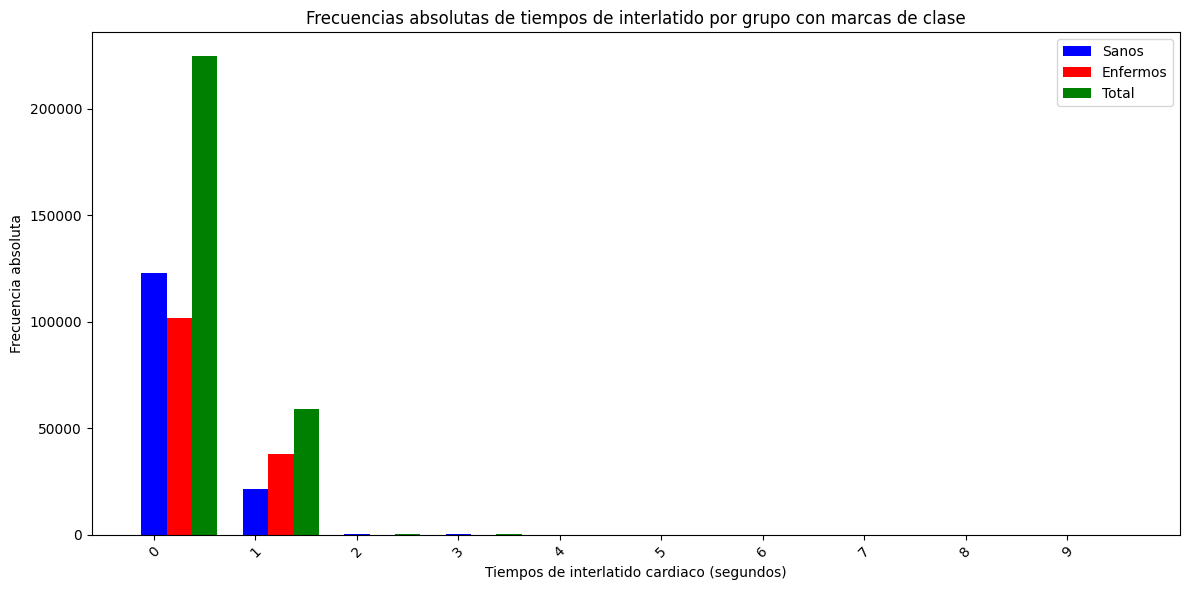

In [208]:
# Definir límites de intervalos basados en los datos reales
intervalos = pd.interval_range(start=df_sanos['Tiempos de interlatido'].min(), 
                               end=df_sanos['Tiempos de interlatido'].max(), 
                               freq=(df_sanos['Tiempos de interlatido'].max() - df_sanos['Tiempos de interlatido'].min()) / 10)

# Calcular las frecuencias absolutas para sanos y enfermos usando los mismos intervalos
frecuencias_absolutas_sanos = pd.cut(df_sanos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()
frecuencias_absolutas_enfermos = pd.cut(df_enfermos['Tiempos de interlatido'], bins=intervalos).value_counts().sort_index()

# Calcular la frecuencia total
frecuencia_total = frecuencias_absolutas_sanos + frecuencias_absolutas_enfermos

# Calcular marcas de clase, límites reales inferiores (LRI) y límites reales superiores (LRS)
LI = [interval.left for interval in intervalos]
LS = [interval.right for interval in intervalos]
MC = [(interval.left + interval.right) / 2 for interval in intervalos]
LRI = [interval.left - 0.5 for interval in intervalos]
LRS = [interval.right + 0.5 for interval in intervalos]

# Crear DataFrame para las frecuencias absolutas por grupos
tabla_frecuencias_abs = pd.DataFrame({
    'LI': LI,
    'LS': LS,
    'LRI': LRI,
    'LRS': LRS,
    'MC': MC,
    'f_s': frecuencias_absolutas_sanos.values,
    'f_e': frecuencias_absolutas_enfermos.values,
    'f_t': frecuencia_total.values,
})

# Imprimir la tabla de frecuencias absolutas por grupos con marcas de clase
print("Tabla de frecuencias absolutas de tiempos de interlatido por grupo con marcas de clase:")
print(tabla_frecuencias_abs)

# Graficar las frecuencias absolutas por grupos con marcas de clase
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencias_abs.index, tabla_frecuencias_abs['f_s'], width=0.25, label='Sanos', color='blue', align='center')
plt.bar(tabla_frecuencias_abs.index + 0.25, tabla_frecuencias_abs['f_e'], width=0.25, label='Enfermos', color='red', align='center')
plt.bar(tabla_frecuencias_abs.index + 0.5, tabla_frecuencias_abs['f_t'], width=0.25, label='Total', color='green', align='center')
plt.xlabel('Tiempos de interlatido cardiaco (segundos)')
plt.ylabel('Frecuencia absoluta')
plt.title('Frecuencias absolutas de tiempos de interlatido por grupo con marcas de clase')
plt.legend()
plt.xticks(range(len(tabla_frecuencias_abs)), tabla_frecuencias_abs.index, rotation=45)
plt.tight_layout()
plt.show()

# Histrograma de frecuencias absolutas

# Cálculos

## Cálculo de frecuencia absoluta acumulada

## Cálculo de frecuencia relativa acumulada

## Cálculo de frecuencia absoluta sobreviviente

Cálculo de frecuencia relativa sobreviviente

# Funciones

## Función de densidad probabilidad

## Función de distribución de la muestra

# Determinación de la función de densidad de probabilidad teórica

# Comparación entre función de distribución de la muestra y la teórica

# Determinaciones

## Primeros tres momentos(Usar la definición en base a la esperanza matemática)

## Coeficiente de variación

## Sesgo

## Kurtosis(Cómo se comparan los valores experimentales con los obtenidos de la función téorica)

# Intervalos

## Intervalo de confianza para la media de la población

## Intervalo de confianza para la varianza de la población

# Pruebas

## Prueba *t_Student*

## Prueba Chi-cuadrada

## Prueba de Kolmogorov - Smirnov